In [1]:
import psycopg2
from psycopg2 import Error
from config import config
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
try:
    # Connect to an existing database
    params=config()
    conn = psycopg2.connect(**params)

    # Create a cursor to perform database operations
    cur = conn.cursor()

    def pd_df(sql_query, database = conn):
        table = pd.read_sql_query(sql_query, database)
        return table
    salaries=pd_df('SELECT * from salaries')
    employee=pd_df('select * from employees')
    title=pd_df('select * from titles')
    

except (Exception, Error) as error:
    print("Error while connecting to PostgreSQL", error)
# finally:
#     if (conn):
#         cur.close()
#         conn.close()
#         print("PostgreSQL connection is closed")


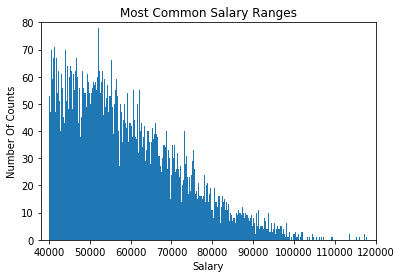

In [2]:
plt.hist(salaries['salary'],bins=10000)
plt.title("Most Common Salary Ranges")
plt.xlabel("Salary")
plt.ylabel('Number Of Counts')
plt.xlim(38000,120000)
plt.ylim(0,80)

plt.show()

In [5]:
employee

,emp_no,emp_title_id,birth_date,first_name,last_name,sex,hire_date
0,473302,s0001,1953-07-25,Hideyuki,Zallocco,M,1990-04-28
1,475053,e0002,1954-11-18,Byong,Delgrande,F,1991-09-07
2,57444,e0002,1958-01-30,Berry,Babb,F,1992-03-21
3,421786,s0001,1957-09-28,Xiong,Verhoeff,M,1987-11-26
4,282238,e0003,1952-10-28,Abdelkader,Baumann,F,1991-01-18
...,...,...,...,...,...,...,...
300019,464231,s0001,1958-08-14,Constantino,Eastman,M,1988-10-28
300020,255832,e0002,1955-05-08,Yuping,Dayang,F,1995-02-26
300021,76671,s0001,1959-06-09,Ortrud,Plessier,M,1988-02-24
300022,264920,s0001,1959-09-22,Percy,Samarati,F,1994-09-08


In [13]:
#rename column to merge table
employee=employee.rename(columns={'emp_title_id':'title_id'})

#merge Table(employee) and Table(title)
merge1=employee.merge(title,how='left',on='title_id')

#merge Table(salaries) with above merged Table
FinalTable=merge1.merge(salaries,how='left',on='emp_no')


In [14]:
Group_df=FinalTable.groupby(FinalTable['title'])['salary'].mean()
Group_df

title
Assistant Engineer    48564.434447
Engineer              48535.336511
Manager               51531.041667
Senior Engineer       48506.799871
Senior Staff          58550.172704
Staff                 58465.382850
Technique Leader      48582.896092
Name: salary, dtype: float64

In [15]:
x_axis=np.arange(len(Group_df))
# plt.bar()